In [8]:
#importing libraries
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np   # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [9]:
#reading the data
train = pd.read_csv('train_v9rqX0R.csv')

In [10]:
test = pd.read_csv('test_AbJTz2l.csv')

# Exploring data

In [11]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
train.shape

(8523, 12)

In [14]:
# checking null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

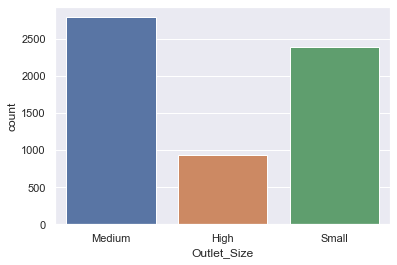

In [15]:
sns.countplot(x='Outlet_Size', data=train)

In [16]:
train.columns.to_list()

['Item_Identifier',
 'Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


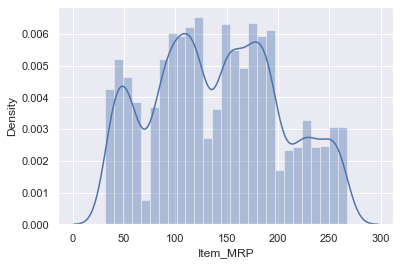

In [17]:
ax = sns.distplot(train['Item_MRP'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


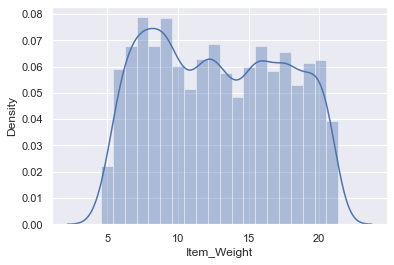

In [18]:
ax = sns.distplot(train['Item_Weight'])

In [19]:
#fill null values in item_weight 
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


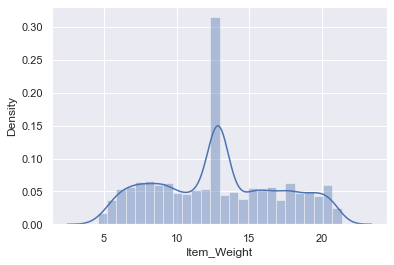

In [20]:
ax = sns.distplot(train['Item_Weight'])

## dealing with Outliers


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

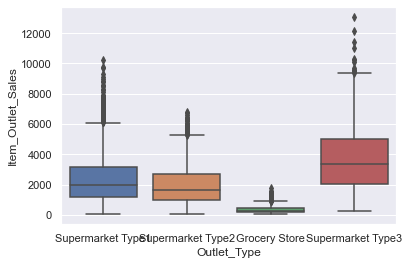

In [21]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train)

In [22]:
train[train.Outlet_Type=='Supermarket Type3'].Item_Outlet_Sales.max()

13086.9648

In [23]:
train[train.Item_Outlet_Sales==13086.9648]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7188,NCE42,12.857645,Low Fat,0.010551,Household,234.9958,OUT027,1985,Medium,Tier 3,Supermarket Type3,13086.9648


In [24]:
train=train.drop(index=7188)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

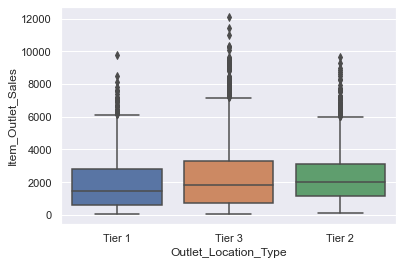

In [25]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train)

In [26]:
train[train.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [27]:
train[train.Item_Outlet_Sales==9779.9362]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4289,NCM05,6.825,Low Fat,0.059847,Health and Hygiene,262.5226,OUT046,1997,Small,Tier 1,Supermarket Type1,9779.9362


In [28]:
train=train.drop(index=4289)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

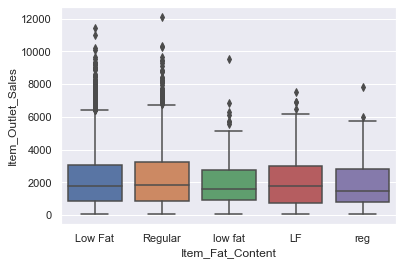

In [29]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train)

In [30]:
print(train[train.Item_Fat_Content=='Regular'].Item_Outlet_Sales.max())
print(train[train.Item_Fat_Content=='low fat'].Item_Outlet_Sales.max())
print(train[train.Item_Fat_Content=='reg'].Item_Outlet_Sales.max())

12117.56
9562.2196
7833.8028


In [31]:
train[train.Item_Outlet_Sales==12117.56]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5223,FDQ19,12.857645,Regular,0.014296,Fruits and Vegetables,242.6512,OUT027,1985,Medium,Tier 3,Supermarket Type3,12117.56


In [32]:
train[train.Item_Outlet_Sales==9562.2196]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5500,FDG32,12.857645,low fat,0.175143,Fruits and Vegetables,222.3772,OUT027,1985,Medium,Tier 3,Supermarket Type3,9562.2196


In [33]:
train[train.Item_Outlet_Sales==7833.8028]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
753,FDY26,20.6,reg,0.030511,Dairy,211.4244,OUT046,1997,Small,Tier 1,Supermarket Type1,7833.8028


In [34]:
train=train.drop(index=[5500,5223,753])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

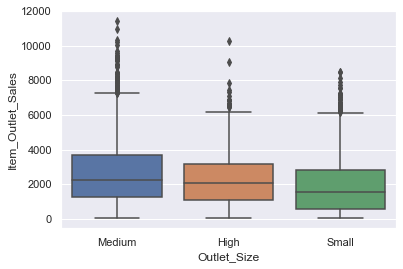

In [35]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

In [36]:
 train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [37]:
print(train[train.Outlet_Size=='High'].Item_Outlet_Sales.max())

10256.649


In [38]:
train[train.Item_Outlet_Sales==10256.649]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4888,FDF39,14.85,Regular,0.019495,Dairy,261.291,OUT013,1987,High,Tier 3,Supermarket Type1,10256.649


In [39]:
train=train.drop(index=4888)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

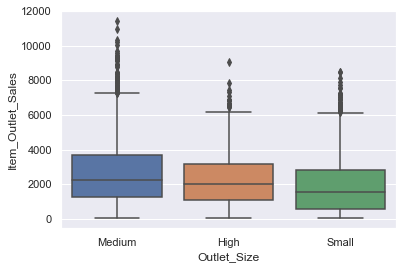

In [40]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

In [41]:
print(train[train.Outlet_Size=='High'].Item_Outlet_Sales.max())

9069.5276


In [42]:
train[train.Item_Outlet_Sales==9069.5276]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6409,FDA21,13.65,Low Fat,0.035931,Snack Foods,184.4924,OUT013,1987,High,Tier 3,Supermarket Type1,9069.5276


In [43]:
train=train.drop(index=6409)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

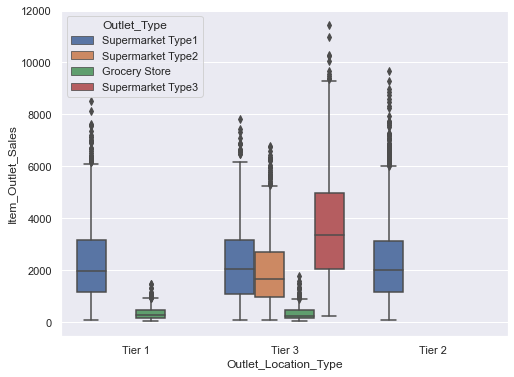

In [44]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=train)

In [45]:
pd.set_option('display.max_rows', 4000)

In [46]:

display(train[train.Outlet_Size.isnull()])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
33,FDO23,17.850,Low Fat,0.000000,Breads,93.1436,OUT045,2002,NaN,Tier 2,Supermarket Type1,2174.5028
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
46,NCP05,19.600,Low Fat,0.000000,Health and Hygiene,153.3024,OUT045,2002,NaN,Tier 2,Supermarket Type1,2428.8384
47,FDV49,10.000,Low Fat,0.025880,Canned,265.2226,OUT045,2002,NaN,Tier 2,Supermarket Type1,5815.0972


In [47]:
train.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Name: Outlet_Location_Type, dtype: int64

In [48]:
train.groupby('Outlet_Type').get_group('Grocery Store')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
23,FDC37,12.857645,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
28,FDE51,5.925000,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
29,FDC14,12.857645,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
30,FDV38,19.250000,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420000,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
49,FDS02,12.857645,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,12.857645,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720
63,FDY40,12.857645,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076
65,FDC46,17.700000,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266


In [49]:
train.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          928
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           930
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         932
Name: Outlet_Size, dtype: int64

Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop
Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [50]:
train.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               930
Medium       OUT027               932
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               928
             OUT019               528
Name: Outlet_Identifier, dtype: int64

In [51]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [52]:
train.Outlet_Size=train.apply(func,axis=1)

In [53]:
test.Outlet_Size=test.apply(func,axis=1)

In [54]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [55]:
train.Item_Fat_Content=train.Item_Fat_Content.replace('LF','Low Fat')
train.Item_Fat_Content=train.Item_Fat_Content.replace('reg','Regular')
train.Item_Fat_Content=train.Item_Fat_Content.replace('low fat','Low Fat')

In [56]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [57]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [58]:
test.Item_Fat_Content=test.Item_Fat_Content.replace('LF','Low Fat')
test.Item_Fat_Content=test.Item_Fat_Content.replace('reg','Regular')
test.Item_Fat_Content=test.Item_Fat_Content.replace('low fat','Low Fat')

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

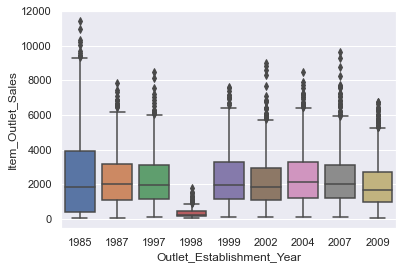

In [59]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train)

In [60]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,FDA15,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,DRC01,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,FDN15,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,FDX07,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,NCD19,Tier 3,Supermarket Type1,994.7052


In [61]:
#attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

In [62]:
train =train.drop(['Item_Identifier','Item_Visibility'],axis=1)


In [63]:
test = test.drop(['Item_Identifier','Item_Visibility'],axis=1)

In [64]:
train.columns.to_list()

['Item_Weight',
 'Item_Fat_Content',
 'Item_Type',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [65]:
X1 = train.drop('Item_Outlet_Sales',1)
y1 = train.Item_Outlet_Sales
tes = test

## CatBoost Regressor

In [66]:
cate_features_index = np.where(X1.dtypes == object) [0]
cate_features_index

array([1, 2, 4, 6, 7, 8], dtype=int64)

In [67]:
err=[]
r=[]
y_pred_totcb=[]

fold=KFold(n_splits=10, random_state=1234)
for train_index, test_index in fold.split(X1,y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    m1 = CatBoostRegressor(iterations=50000, learning_rate=0.01, random_seed=1234, eval_metric='RMSE')
    m1.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500,verbose=100,cat_features=cate_features_index)
    preds = m1.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err.append(np.sqrt(mean_squared_error(y_test,preds)))
    r = r2_score(y_test, preds)
    print("R^2: %f" % (r*100))
   
    p2 = m1.predict(tes)
    y_pred_totcb.append(p2)
np.mean(err)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0:	learn: 1675.6020904	test: 1675.6510038	test1: 1738.1917268	best: 1738.1917268 (0)	total: 190ms	remaining: 2h 38m 41s
100:	learn: 1188.7595961	test: 1188.0873782	test1: 1245.4736330	best: 1245.4736330 (100)	total: 5.78s	remaining: 47m 33s
200:	learn: 1082.9140218	test: 1082.1215338	test1: 1130.9074353	best: 1130.9074353 (200)	total: 11.4s	remaining: 47m 1s
300:	learn: 1059.1925305	test: 1057.8453095	test1: 1103.3833040	best: 1103.3833040 (300)	total: 17s	remaining: 46m 39s
400:	learn: 1051.1049377	test: 1049.4540221	test1: 1095.8299773	best: 1095.8299773 (400)	total: 22.5s	remaining: 46m 22s
500:	learn: 1046.3496583	test: 1045.6715598	test1: 1093.5603055	best: 1093.5603055 (500)	total: 28.2s	remaining: 46m 22s
600:	learn: 1042.5548717	test: 1043.2308345	test1: 1092.8306713	best: 1092.8306713 (600)	total: 33.7s	remaining: 46m 13s
700:	learn: 1039.1626169	test: 1042.2516610	test1: 1092.5360310	best: 1092.4954686 (695)	total: 38.9s	remaining: 45m 38s
800:	learn: 1036.0988137	test: 1041.

400:	learn: 1059.0184170	test: 1058.7935054	test1: 1018.1797779	best: 1018.1797779 (400)	total: 20.9s	remaining: 43m 8s
500:	learn: 1053.7019047	test: 1054.8749383	test1: 1015.0865734	best: 1015.0865734 (500)	total: 26.2s	remaining: 43m 6s
600:	learn: 1049.9179465	test: 1052.3418200	test1: 1013.7861940	best: 1013.7861940 (600)	total: 31.5s	remaining: 43m 6s
700:	learn: 1046.3686328	test: 1050.7995462	test1: 1013.1656864	best: 1013.1631573 (698)	total: 36.4s	remaining: 42m 43s
800:	learn: 1042.8458259	test: 1049.4184718	test1: 1012.8794551	best: 1012.8794551 (800)	total: 41.5s	remaining: 42m 29s
900:	learn: 1039.1417011	test: 1048.5809533	test1: 1012.7598949	best: 1012.6227329 (839)	total: 46.7s	remaining: 42m 25s
1000:	learn: 1035.6851907	test: 1047.6144780	test1: 1012.9953958	best: 1012.6227329 (839)	total: 52.1s	remaining: 42m 30s
1100:	learn: 1032.6667957	test: 1046.6719015	test1: 1013.2207735	best: 1012.6227329 (839)	total: 57.5s	remaining: 42m 34s
1200:	learn: 1030.0144376	test: 1

1062.2356296754692

## LGBM Regressor

In [68]:
col = [
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']
for i in col:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [69]:
X1 = train.drop('Item_Outlet_Sales',1)
y1 = train.Item_Outlet_Sales
tes = test

In [70]:
r1=[]
err1=[]
y_pred_totcb1=[]

fold=KFold(n_splits=10, random_state=1234)
for train_index, test_index in fold.split(X1,y1):
    X_train, X_test = X1.iloc[train_index], X1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]
    m2 = LGBMRegressor(n_estimators=1000, max_depth=-1, learning_rate=0.006, random_state=42)
    m2.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500,verbose=100,)
    preds = m2.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err1.append(np.sqrt(mean_squared_error(y_test,preds)))
    r = r2_score(y_test, preds)
    print("R^2: %f" % (r*100))
    
    p2 = m2.predict(tes)
    y_pred_totcb1.append(p2)
np.mean(err1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.61341e+06	valid_1's l2: 1.79359e+06
[200]	training's l2: 1.22376e+06	valid_1's l2: 1.39493e+06
[300]	training's l2: 1.08542e+06	valid_1's l2: 1.26683e+06
[400]	training's l2: 1.02646e+06	valid_1's l2: 1.22634e+06
[500]	training's l2: 989745	valid_1's l2: 1.21012e+06
[600]	training's l2: 962503	valid_1's l2: 1.2048e+06
[700]	training's l2: 940126	valid_1's l2: 1.20616e+06
[800]	training's l2: 921539	valid_1's l2: 1.21136e+06
[900]	training's l2: 905920	valid_1's l2: 1.21431e+06
[1000]	training's l2: 891338	valid_1's l2: 1.21475e+06
Did not meet early stopping. Best iteration is:
[1000]	training's l2: 891338	valid_1's l2: 1.21475e+06
err:  1102.157075181553
R^2: 60.155547


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.61456e+06	valid_1's l2: 1.80764e+06
[200]	training's l2: 1.22548e+06	valid_1's l2: 1.39389e+06
[300]	training's l2: 1.0903e+06	valid_1's l2: 1.26057e+06
[400]	training's l2: 1.03008e+06	valid_1's l2: 1.21104e+06
[500]	training's l2: 995330	valid_1's l2: 1.19153e+06
[600]	training's l2: 969492	valid_1's l2: 1.18512e+06
[700]	training's l2: 948605	valid_1's l2: 1.18523e+06
[800]	training's l2: 931830	valid_1's l2: 1.1801e+06
[900]	training's l2: 916025	valid_1's l2: 1.17892e+06
[1000]	training's l2: 901107	valid_1's l2: 1.17964e+06
Did not meet early stopping. Best iteration is:
[1000]	training's l2: 901107	valid_1's l2: 1.17964e+06
err:  1086.112365639992
R^2: 61.883185


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.62242e+06	valid_1's l2: 1.665e+06
[200]	training's l2: 1.22694e+06	valid_1's l2: 1.34102e+06
[300]	training's l2: 1.08876e+06	valid_1's l2: 1.25656e+06
[400]	training's l2: 1.02665e+06	valid_1's l2: 1.24352e+06
[500]	training's l2: 988692	valid_1's l2: 1.25466e+06
[600]	training's l2: 962523	valid_1's l2: 1.2638e+06
[700]	training's l2: 940972	valid_1's l2: 1.27067e+06
[800]	training's l2: 923881	valid_1's l2: 1.28036e+06
Early stopping, best iteration is:
[382]	training's l2: 1.03577e+06	valid_1's l2: 1.24228e+06
err:  1114.5753027113435
R^2: 55.260383


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.62889e+06	valid_1's l2: 1.65463e+06
[200]	training's l2: 1.23703e+06	valid_1's l2: 1.28279e+06
[300]	training's l2: 1.09942e+06	valid_1's l2: 1.1742e+06
[400]	training's l2: 1.03806e+06	valid_1's l2: 1.14504e+06
[500]	training's l2: 1.00062e+06	valid_1's l2: 1.14296e+06
[600]	training's l2: 974531	valid_1's l2: 1.14312e+06
[700]	training's l2: 952892	valid_1's l2: 1.1457e+06
[800]	training's l2: 934928	valid_1's l2: 1.15203e+06
[900]	training's l2: 918312	valid_1's l2: 1.15568e+06
[1000]	training's l2: 903893	valid_1's l2: 1.15748e+06
Did not meet early stopping. Best iteration is:
[1000]	training's l2: 903893	valid_1's l2: 1.15748e+06
err:  1075.8622321324412
R^2: 59.417282


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.63121e+06	valid_1's l2: 1.50295e+06
[200]	training's l2: 1.23e+06	valid_1's l2: 1.23158e+06
[300]	training's l2: 1.08937e+06	valid_1's l2: 1.18087e+06
[400]	training's l2: 1.02593e+06	valid_1's l2: 1.1863e+06
[500]	training's l2: 989307	valid_1's l2: 1.20589e+06
[600]	training's l2: 963177	valid_1's l2: 1.21889e+06
[700]	training's l2: 943165	valid_1's l2: 1.22646e+06
[800]	training's l2: 925565	valid_1's l2: 1.23315e+06
Early stopping, best iteration is:
[316]	training's l2: 1.07594e+06	valid_1's l2: 1.17992e+06
err:  1086.2396531006978
R^2: 54.039294


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.63642e+06	valid_1's l2: 1.5809e+06
[200]	training's l2: 1.24056e+06	valid_1's l2: 1.22172e+06
[300]	training's l2: 1.10019e+06	valid_1's l2: 1.11531e+06
[400]	training's l2: 1.04037e+06	valid_1's l2: 1.08848e+06
[500]	training's l2: 1.00466e+06	valid_1's l2: 1.07952e+06
[600]	training's l2: 977669	valid_1's l2: 1.07806e+06
[700]	training's l2: 956425	valid_1's l2: 1.08302e+06
[800]	training's l2: 938124	valid_1's l2: 1.08953e+06
[900]	training's l2: 920502	valid_1's l2: 1.09655e+06
[1000]	training's l2: 905959	valid_1's l2: 1.10105e+06
Did not meet early stopping. Best iteration is:
[1000]	training's l2: 905959	valid_1's l2: 1.10105e+06
err:  1049.3074121449145
R^2: 60.159278


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.6386e+06	valid_1's l2: 1.56583e+06
[200]	training's l2: 1.24539e+06	valid_1's l2: 1.19273e+06
[300]	training's l2: 1.10765e+06	valid_1's l2: 1.08133e+06
[400]	training's l2: 1.04466e+06	valid_1's l2: 1.05141e+06
[500]	training's l2: 1.00742e+06	valid_1's l2: 1.05023e+06
[600]	training's l2: 979180	valid_1's l2: 1.05442e+06
[700]	training's l2: 957616	valid_1's l2: 1.05789e+06
[800]	training's l2: 939835	valid_1's l2: 1.06238e+06
[900]	training's l2: 924498	valid_1's l2: 1.06858e+06
Early stopping, best iteration is:
[451]	training's l2: 1.02431e+06	valid_1's l2: 1.04959e+06
err:  1024.493758608695
R^2: 62.123397


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.6302e+06	valid_1's l2: 1.65185e+06
[200]	training's l2: 1.23906e+06	valid_1's l2: 1.28095e+06
[300]	training's l2: 1.10096e+06	valid_1's l2: 1.16738e+06
[400]	training's l2: 1.03992e+06	valid_1's l2: 1.13527e+06
[500]	training's l2: 1.00305e+06	valid_1's l2: 1.12856e+06
[600]	training's l2: 977430	valid_1's l2: 1.12845e+06
[700]	training's l2: 956171	valid_1's l2: 1.13192e+06
[800]	training's l2: 938932	valid_1's l2: 1.13379e+06
[900]	training's l2: 923008	valid_1's l2: 1.13474e+06
[1000]	training's l2: 908583	valid_1's l2: 1.13503e+06
Did not meet early stopping. Best iteration is:
[1000]	training's l2: 908583	valid_1's l2: 1.13503e+06
err:  1065.3775720641734
R^2: 60.240784


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.62769e+06	valid_1's l2: 1.65696e+06
[200]	training's l2: 1.2344e+06	valid_1's l2: 1.27074e+06
[300]	training's l2: 1.09621e+06	valid_1's l2: 1.15551e+06
[400]	training's l2: 1.03645e+06	valid_1's l2: 1.11546e+06
[500]	training's l2: 1.00115e+06	valid_1's l2: 1.10743e+06
[600]	training's l2: 974073	valid_1's l2: 1.10601e+06
[700]	training's l2: 953689	valid_1's l2: 1.10407e+06
[800]	training's l2: 937175	valid_1's l2: 1.10484e+06
[900]	training's l2: 923035	valid_1's l2: 1.10669e+06
[1000]	training's l2: 909507	valid_1's l2: 1.10806e+06
Did not meet early stopping. Best iteration is:
[1000]	training's l2: 909507	valid_1's l2: 1.10806e+06
err:  1052.642854070236
R^2: 62.366022


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


Training until validation scores don't improve for 500 rounds
[100]	training's l2: 1.61814e+06	valid_1's l2: 1.72e+06
[200]	training's l2: 1.22597e+06	valid_1's l2: 1.37109e+06
[300]	training's l2: 1.08707e+06	valid_1's l2: 1.26706e+06
[400]	training's l2: 1.02743e+06	valid_1's l2: 1.24624e+06
[500]	training's l2: 992696	valid_1's l2: 1.24199e+06
[600]	training's l2: 967889	valid_1's l2: 1.24092e+06
[700]	training's l2: 945918	valid_1's l2: 1.2439e+06
[800]	training's l2: 928517	valid_1's l2: 1.2498e+06
[900]	training's l2: 912062	valid_1's l2: 1.25493e+06
[1000]	training's l2: 895919	valid_1's l2: 1.25973e+06
Did not meet early stopping. Best iteration is:
[1000]	training's l2: 895919	valid_1's l2: 1.25973e+06
err:  1122.376318230915
R^2: 56.545392


1077.9144543884963

In [71]:
col = [
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']
for i in col:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')

In [72]:
X = pd.get_dummies(data=train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type'], drop_first=True)
tes = pd.get_dummies(data=test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type'], drop_first=True)

In [73]:
from sklearn.preprocessing import LabelEncoder
encode = ['Item_Type','Outlet_Identifier','Outlet_Size']
le = LabelEncoder()
for cols in encode:
    X[cols] = le.fit_transform(X[cols])
    tes[cols] = le.fit_transform(tes[cols])

In [74]:
train.Outlet_Establishment_Year=train.Outlet_Establishment_Year.astype('category')
test.Outlet_Establishment_Year=test.Outlet_Establishment_Year.astype('category')

In [75]:
X.head()

,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,4,249.8092,9,1999,156,3735.1380,0,0,0,1,0,0
1,5.92,14,48.2692,3,2009,8,443.4228,1,0,1,0,1,0
2,17.50,10,141.6180,9,1999,662,2097.2700,0,0,0,1,0,0
3,19.20,6,182.0950,0,1998,1121,732.3800,1,0,1,0,0,0
4,8.93,9,53.8614,1,1987,1297,994.7052,0,0,1,1,0,0


In [76]:
x = X.drop(columns='Item_Outlet_Sales')
y = X['Item_Outlet_Sales']


## XGBoost

In [77]:
err3=[]
y_pred_totcb3=[]

fold=KFold(n_splits=10, random_state=1234)
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m3 = XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.07, random_state=42)
    m3.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100,)
    preds = m3.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err3.append(np.sqrt(mean_squared_error(y_test,preds)))
    p3 = m3.predict(tes)
    y_pred_totcb3.append(p2)
np.mean(err3)

[0]	validation_0-rmse:2583.74512	validation_1-rmse:2663.14648


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[100]	validation_0-rmse:963.56952	validation_1-rmse:1114.27905
[171]	validation_0-rmse:924.82806	validation_1-rmse:1129.80102
err:  1111.1695009834525
[0]	validation_0-rmse:2584.31958	validation_1-rmse:2657.35205
[100]	validation_0-rmse:969.64777	validation_1-rmse:1101.92627
[162]	validation_0-rmse:930.76276	validation_1-rmse:1110.41553
err:  1094.2232607265687
[0]	validation_0-rmse:2596.96606	validation_1-rmse:2538.07666
[100]	validation_0-rmse:965.48730	validation_1-rmse:1116.36609
[143]	validation_0-rmse:940.29657	validation_1-rmse:1120.82129
err:  1105.9338876811203
[0]	validation_0-rmse:2592.41260	validation_1-rmse:2582.77710
[100]	validation_0-rmse:976.50891	validation_1-rmse:1072.59448
[179]	validation_0-rmse:928.69952	validation_1-rmse:1073.70947
err:  1072.2370164734268
[0]	validation_0-rmse:2598.55347	validation_1-rmse:2513.91211
[100]	validation_0-rmse:969.36493	validation_1-rmse:1104.59717
[136]	validation_0-rmse:944.05096	validation_1-rmse:1106.98181
err:  1077.82066299748

1078.5991997445258

## Linear Regression

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
err4=[]
y_pred_totcb4=[]

fold=KFold(n_splits=5, random_state=1234)
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m1 = LinearRegression()
    m1.fit(X_train,y_train)
    preds = m1.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err4.append(np.sqrt(mean_squared_error(y_test,preds)))
    p4 = m1.predict(tes)
    y_pred_totcb4.append(p4)
np.mean(err4)

err:  1146.6462198290474
err:  1119.6036277715332
err:  1095.2562252636542
err:  1100.7993386801247
err:  1124.996673223569


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


1117.4604169535855

## Ridge Regression

In [80]:
from sklearn.linear_model import Ridge
err5=[]
y_pred_totcb5=[]

fold=KFold(n_splits=5, random_state=1234)
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m2 = Ridge(alpha=0.05,solver='cholesky')
    m2.fit(X_train,y_train)
    preds = m2.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err5.append(np.sqrt(mean_squared_error(y_test,preds)))
    p5 = m2.predict(tes)
    y_pred_totcb5.append(p5)
np.mean(err5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


err:  1146.6476188436125
err:  1119.6043556603954
err:  1095.2545859792376
err:  1100.8006260319396
err:  1124.9951436285332


1117.4604660287437

## LASSO Regression

In [81]:
from sklearn.linear_model import Lasso
err6=[]
y_pred_totcb6=[]

fold=KFold(n_splits=5, random_state=1234)
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m3 = Lasso(alpha=0.01)
    m3.fit(X_train,y_train)
    preds = m3.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err6.append(np.sqrt(mean_squared_error(y_test,preds)))
    p6 = m3.predict(tes)
    y_pred_totcb6.append(p6)
np.mean(err6)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


err:  1146.6479324099603
err:  1119.6052132516932
err:  1095.2552099733418
err:  1100.8004169428805
err:  1124.9935522188005


1117.4604649593352

## SVR

In [82]:
from sklearn.svm import SVR
err7=[]
y_pred_totcb7=[]

fold=KFold(n_splits=5, random_state=1234)
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m4 = SVR(epsilon=15,kernel='linear')
    m4.fit(X_train,y_train)
    preds = m4.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err7.append(np.sqrt(mean_squared_error(y_test,preds)))
    p7 = m4.predict(tes)
    y_pred_totcb7.append(p7)
np.mean(err7)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


err:  1326.438790532789
err:  1272.5756513729098
err:  1252.7827353951939
err:  1274.092807076123
err:  1311.1757504527834


1287.4131469659599

## RandomForestRegressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
err8=[]
y_pred_totcb8=[]

fold=KFold(n_splits=5, random_state=1234)
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m5 = RandomForestRegressor()
    m5.fit(X_train,y_train)
    preds = m5.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err8.append(np.sqrt(mean_squared_error(y_test,preds)))
    p8 = m5.predict(tes)
    y_pred_totcb8.append(p8)
np.mean(err8)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


err:  1154.3943309811227
err:  1167.6038791299425
err:  1140.4364236970725
err:  1120.1380872479867
err:  1134.986756463988


1143.5118955040225

## Bagging Regressoion

In [84]:
from sklearn.ensemble import BaggingRegressor
err9=[]
y_pred_totcb9=[]

fold=KFold(n_splits=5, random_state=1234)
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    m6 = BaggingRegressor()
    m6.fit(X_train,y_train)
    preds = m6.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err9.append(np.sqrt(mean_squared_error(y_test,preds)))
    p9 = m6.predict(tes)
    y_pred_totcb9.append(p9)
np.mean(err9)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


err:  1190.5751880188857
err:  1204.4849637039536
err:  1189.301025852648
err:  1175.3214668279943
err:  1182.2922510093867


1188.3949790825736

In [85]:
from sklearn.ensemble import VotingRegressor
estimator = [ ('lgbm', m2), ('xgb', m3), ('cat', m1) ]
weight = [1,1,8]

fold=KFold(n_splits=5, random_state=1234)
for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    regressor = VotingRegressor(estimators = estimator, weights = weight)
    regressor.fit(X_train,y_train)
    preds = regressor.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    err9.append(np.sqrt(mean_squared_error(y_test,preds)))
    p9 = regressor.predict(tes)
    y_pred_totcb9.append(p9)
np.mean(err9)

#regressor = StackingRegressor(estimators=estimators,final_estimator=vregressor)



err:  1146.6465271363052
err:  1119.603854830333
err:  1095.2559555041
err: 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


 1100.7995710710886
err:  1124.996204222309


1152.9277008177003

In [86]:
#consider top 3 regressor predictions
predic1 = np.mean(y_pred_totcb, 0)
predic2 = np.mean(y_pred_totcb1, 0)
predic3 = np.mean(y_pred_totcb3, 0)

In [87]:
a = {"Item_Outlet_Sales": predic1}
b = {"Item_Outlet_Sales": predic2}
c = {"Item_Outlet_Sales": predic3}
sub1 = pd.DataFrame(data=a)
sub2 = pd.DataFrame(data=b)
sub3 = pd.DataFrame(data=c)

In [88]:
#apply weighted average ensemble technique
ave = abs(0.5*sub1 + 0.3*sub2 + 0.2*sub3)

In [89]:
ave.head()

,Item_Outlet_Sales
0,1661.122891
1,1418.391708
2,637.118515
3,2477.522175
4,5885.419568


In [90]:
sample=pd.read_csv('sample_submission_8RXa3c6.csv')
del sample['Item_Outlet_Sales']

In [91]:
corr_ans=pd.concat([sample,ave],axis=1)
corr_ans.head(100)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1661.122891
1,FDW14,OUT017,1418.391708
2,NCN55,OUT010,637.118515
3,FDQ58,OUT017,2477.522175
4,FDY38,OUT027,5885.419568
5,FDH56,OUT046,1922.592009
6,FDL48,OUT018,678.561713
7,FDC48,OUT027,2091.782116
8,FDN33,OUT045,1542.065505
9,FDA36,OUT017,3125.043383


In [92]:
corr_ans.to_csv('correct78.csv',index=None)